In [1]:
import pandas as pd
import numpy as np

In [43]:
dff=pd.read_excel('h.xlsx')


In [44]:
dff['Pre-Retrofit Home Heating Fuel Type'].value_counts()

Natural Gas        23080
Natural gas        17046
Oil                12933
Propane             2744
Electricity         1347
Wood                 410
Wood Pellets         149
Kerosene             113
Coal                  48
Anthracite Coal        5
Bituminous Coal        3
Electric               1
Name: Pre-Retrofit Home Heating Fuel Type, dtype: int64

In [45]:
dff=dff.drop('Location',1)

In [46]:
dff['Type of Program Financing']=dff['Type of Program Financing'].replace(np.nan,'not financed')

In [47]:
dff=dff.drop('Reporting Period',1)

In [48]:
dff=dff.drop(['Home Performance Project ID','Home Performance Site ID','Project Zip'],1)

In [49]:
dff['Project Completion Date']='H'+dff['Project Completion Date'].astype(str)

In [50]:
def f(date):
    if '-' in date:
        return date.split('-')[0][1:]
    else:
        return date.split('/')[2]

In [51]:
s=[]
for i in range(57924):
    s.append(f(dff['Project Completion Date'][i]))

In [52]:
s=pd.DataFrame(s)
s.columns=['Project Completion year']
dff=dff.drop('Project Completion Date',1)
dff=dff.join(s)
dff.head()

,Project County,Project City,Gas Utility,Electric Utility,Customer Type,Low-Rise or Home Performance Indicator,Total Project Cost,Total Incentives,Type of Program Financing,Amount Financed Through Program,...,Year Home Built,Size of Home,Volume of Home,Number of Units,Measure Type,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate,Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N),Project Completion year
0,Herkimer,Salisbury Center,National Grid,National Grid,Market,Home Performance,5235,524,not financed,0.0,...,1900.0,2160.0,25200.0,1.0,Building Shell,383,49,556,Y,2015
1,Oneida,Clinton,National Grid,National Grid,Market,Home Performance,4145,415,not financed,0.0,...,1900.0,1843.0,NaN,1.0,Building Shell,138,37,401,Y,2015
2,Onondaga,Marietta,NaN,New York State Electric & Gas,Market,Home Performance,4310,431,not financed,0.0,...,1975.0,1872.0,16016.0,1.0,Building Shell,15,24,748,Y,2015
3,Herkimer,Ilion,National Grid,Municipal (Not Qualified),Market,Home Performance,3570,357,not financed,0.0,...,1956.0,1972.0,30232.0,1.0,Building Shell,22,6,67,Y,2015
4,Oneida,Vernon,NaN,National Grid,Market,Home Performance,3785,379,not financed,0.0,...,1976.0,1008.0,10272.0,1.0,Building Shell,0,11,324,Y,2015


In [53]:
dff.shape

(57924, 21)

In [54]:
dff.isnull().sum()

Project County                                                              2
Project City                                                                0
Gas Utility                                                             16117
Electric Utility                                                            0
Customer Type                                                               0
Low-Rise or Home Performance Indicator                                      0
Total Project Cost                                                          0
Total Incentives                                                            0
Type of Program Financing                                                   0
Amount Financed Through Program                                             1
Pre-Retrofit Home Heating Fuel Type                                        45
Year Home Built                                                         17411
Size of Home                                                    

In [55]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')



In [56]:
a=dff['Project County']
a=pd.DataFrame(a)


In [57]:
dff['Project County']=imputer.fit_transform(a)


In [58]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [59]:
b=dff['Amount Financed Through Program']
b=pd.DataFrame(b)

In [60]:
dff['Amount Financed Through Program']=imputer.fit_transform(b)

In [86]:
df['Project Completion year']=pd.to_numeric(df['Project Completion year'])

In [61]:
dff.groupby('Pre-Retrofit Home Heating Fuel Type')['Project Completion year','Estimated Annual kWh Savings'].mean().round()


,Estimated Annual kWh Savings
Pre-Retrofit Home Heating Fuel Type,
Anthracite Coal,632.0
Bituminous Coal,14.0
Coal,854.0
Electric,3257.0
Electricity,6282.0
Kerosene,853.0
Natural Gas,298.0
Natural gas,382.0
Oil,192.0


In [88]:
#df['Project Completion year']=str(df['Project Completion year'])

In [62]:
dff['Type of Program Financing']=dff['Type of Program Financing'].replace(np.nan,'not financed')

In [63]:
dff['Pre-Retrofit Home Heating Fuel Type']=dff['Pre-Retrofit Home Heating Fuel Type'].replace('Electric','Electricity')

In [64]:
dff['Pre-Retrofit Home Heating Fuel Type']=dff['Pre-Retrofit Home Heating Fuel Type'].replace('Natural gas','Natural Gas')

In [95]:
df1=df[df['Pre-Retrofit Home Heating Fuel Type'].isnull()]
df1

,Project County,Project City,Gas Utility,Electric Utility,Customer Type,Low-Rise or Home Performance Indicator,Total Project Cost,Total Incentives,Type of Program Financing,Amount Financed Through Program,...,Year Home Built,Size of Home,Volume of Home,Number of Units,Measure Type,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate,Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N),Project Completion year
8677,Onondaga,Syracuse,National Grid,National Grid,Assisted,Home Performance,2545,1273,not financed,0.0,...,1920.0,1696.0,13568.0,1.0,Building Shell,0,2,17,Y,2019
8730,Ontario,Canandaigua,New York State Electric & Gas,Rochester Gas & Electric,Assisted,Home Performance,2923,1461,not financed,0.0,...,1850.0,2042.0,16336.0,1.0,Building Shell,0,8,76,Y,2019
8738,Tompkins,Ithaca,New York State Electric & Gas,New York State Electric & Gas,Assisted,Home Performance,8573,4000,not financed,0.0,...,1890.0,1060.0,8480.0,2.0,Building Shell,0,30,292,Y,2019
8749,Oswego,Oswego,National Grid,National Grid,Assisted,Home Performance,7340,3670,Green Jobs - Green NY Smart Energy Loan,3670.0,...,1920.0,2028.0,16224.0,1.0,Building Shell,0,35,287,Y,2019
8763,Monroe,Rochester,Rochester Gas & Electric,Rochester Gas & Electric,Assisted,Home Performance,2500,1250,not financed,0.0,...,1900.0,1144.0,9152.0,1.0,Building Shell,0,3,23,Y,2019
8772,Oswego,Oswego,National Grid,National Grid,Assisted,Home Performance,7391,3695,Green Jobs - Green NY Smart Energy Loan,3695.0,...,1930.0,1253.0,10024.0,1.0,Building Shell,0,32,268,Y,2019
8794,Chemung,Beaver Dams,New York State Electric & Gas,New York State Electric & Gas,Assisted,Home Performance,8300,4000,Green Jobs - Green NY Smart Energy Loan,4300.0,...,1954.0,864.0,6912.0,1.0,Building Shell,0,39,376,Y,2019
8859,Tioga,Spencer,NaN,New York State Electric & Gas,Assisted,Home Performance,2867,1434,not financed,0.0,...,1984.0,1850.0,14800.0,1.0,Building Shell,3466,0,364,Y,2019
8867,Oneida,Vernon,NaN,National Grid,Market,Home Performance,13400,0,not financed,0.0,...,1840.0,2350.0,18800.0,1.0,Building Shell,0,38,916,Y,2019
8978,Cortland,Cortland,New York State Electric & Gas,National Grid,Assisted,Home Performance,10904,4000,Green Jobs - Green NY Smart Energy Loan,6904.0,...,1906.0,1500.0,12000.0,1.0,Building Shell,0,59,568,Y,2019


In [65]:
dff['Pre-Retrofit Home Heating Fuel Type'][30160]='Oil'

E:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
dff['Pre-Retrofit Home Heating Fuel Type'][8859]='Anthracite Coal'

E:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
dff['Pre-Retrofit Home Heating Fuel Type'][9011]='Anthracite Coal'

E:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
dff['Pre-Retrofit Home Heating Fuel Type'][10552]='Anthracite Coal'

E:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
dff['Pre-Retrofit Home Heating Fuel Type'][10997]='Anthracite Coal';

E:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
dff['Pre-Retrofit Home Heating Fuel Type']=df['Pre-Retrofit Home Heating Fuel Type'].replace(np.nan,'Bituminous Coal')

In [71]:
dff['Project Completion year'].value_counts()

2015    8579
2016    8116
2011    6840
2014    6370
2017    5975
2013    5861
2012    5755
2018    5392
2019    4099
2010     937
Name: Project Completion year, dtype: int64

In [83]:
dff.isnull().sum()


Project County                                                          0
Project City                                                            0
Gas Utility                                                             0
Electric Utility                                                        0
Customer Type                                                           0
Low-Rise or Home Performance Indicator                                  0
Total Project Cost                                                      0
Total Incentives                                                        0
Type of Program Financing                                               0
Amount Financed Through Program                                         0
Pre-Retrofit Home Heating Fuel Type                                     0
Year Home Built                                                         0
Size of Home                                                            0
Volume of Home                        

In [34]:
df1=df[df['Pre-Retrofit Home Heating Fuel Type'].isnull()]
df1.shape

(0, 21)

In [35]:
df.columns

Index(['Project County', 'Project City', 'Gas Utility', 'Electric Utility',
       'Customer Type', 'Low-Rise or Home Performance Indicator',
       'Total Project Cost', 'Total Incentives', 'Type of Program Financing',
       'Amount Financed Through Program',
       'Pre-Retrofit Home Heating Fuel Type', 'Year Home Built',
       'Size of Home', 'Volume of Home', 'Number of Units', 'Measure Type',
       'Estimated Annual kWh Savings', 'Estimated Annual MMBtu Savings',
       'First Year Energy Savings $ Estimate',
       'Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)',
       'Project Completion year'],
      dtype='object')

In [78]:
dff['Gas Utility']=df31['Gas Utility']

In [79]:
dff['Year Home Built']=df31['Year Home Built']

In [80]:
dff['Size of Home']=df31['Size of Home']

In [81]:
dff['Volume of Home']=df31['Volume of Home']

In [82]:
dff['Number of Units']=df31['Number of Units']

In [84]:
dff.to_excel('h_final.xlsx')

In [91]:
dummy=pd.get_dummies(dff['Customer Type'])

In [101]:
dff=pd.concat((dff,dummy),axis=1)

In [102]:
dff=dff.drop(['Customer Type'],axis=1)

In [103]:
dff=dff.drop(['Market'],axis=1)

In [104]:
dff=dff.rename(columns={'Assisted':'Customer Type'})

In [105]:
dummy1=pd.get_dummies(dff['Low-Rise or Home Performance Indicator'])

In [106]:
dff=pd.concat((dff,dummy1),axis=1)

In [107]:
dff=dff.drop(['Low-Rise or Home Performance Indicator'],axis=1)

In [108]:
dff=dff.drop(['Low-Rise'],axis=1)

In [109]:
dff=dff.rename(columns={'Home Performance Indicator':'Low-Rise or Home Performance Indicator'})

In [110]:
dummy2=pd.get_dummies(dff['Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)'])

In [111]:
dff=pd.concat((dff,dummy2),axis=1)

In [112]:
dff=dff.drop(['Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)'],axis=1)

In [113]:
dff=dff.drop(['N'],axis=1)

In [114]:
dff=dff.rename(columns={'Y':'Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)'})

In [116]:
dff.shape

(57924, 21)

In [117]:
dff.to_excel('h_final1.xlsx')

In [53]:
df['Pre-Retrofit Home Heating Fuel Type'].value_counts()

Natural Gas        40126
Oil                12934
Propane             2744
Electricity         1348
Wood                 410
Wood Pellets         149
Kerosene             113
Coal                  48
Bituminous Coal       43
Anthracite Coal        9
Name: Pre-Retrofit Home Heating Fuel Type, dtype: int64

In [54]:
for col in df.columns:
    print(col,': ',len(df[col].unique()),'labels')

Project County :  62 labels
Project City :  1496 labels
Gas Utility :  15 labels
Electric Utility :  8 labels
Total Project Cost :  15990 labels
Total Incentives :  4774 labels
Type of Program Financing :  5 labels
Amount Financed Through Program :  9291 labels
Pre-Retrofit Home Heating Fuel Type :  10 labels
Year Home Built :  218 labels
Size of Home :  2986 labels
Volume of Home :  11507 labels
Number of Units :  5 labels
Measure Type :  3 labels
Estimated Annual kWh Savings :  4963 labels
Estimated Annual MMBtu Savings :  367 labels
First Year Energy Savings $ Estimate :  3625 labels
Project Completion year :  10 labels
Customer Type :  2 labels
Home Performance :  2 labels
Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N) :  2 labels


In [55]:
df['Gas Utility'].value_counts().sort_values(ascending=False).head(20)

Rochester Gas & Electric          13727
National Grid                     13509
National Fuel Gas Distribution     6233
New York State Electric & Gas      4422
Consolidated Edison                2044
Orange & Rockland                   808
Central Hudson Gas & Electric       599
Corning Natural Gas                 179
Saint Lawrence Gas                   87
Multiple Gas Providers               86
No Gas Provider                      49
KeySpan Energy                       32
Municipal                            22
Long Island Power Authority          10
Name: Gas Utility, dtype: int64

In [56]:
for col in df.columns:
    print(col,': ',len(df[col].unique()),'type')

Project County :  62 type
Project City :  1496 type
Gas Utility :  15 type
Electric Utility :  8 type
Total Project Cost :  15990 type
Total Incentives :  4774 type
Type of Program Financing :  5 type
Amount Financed Through Program :  9291 type
Pre-Retrofit Home Heating Fuel Type :  10 type
Year Home Built :  218 type
Size of Home :  2986 type
Volume of Home :  11507 type
Number of Units :  5 type
Measure Type :  3 type
Estimated Annual kWh Savings :  4963 type
Estimated Annual MMBtu Savings :  367 type
First Year Energy Savings $ Estimate :  3625 type
Project Completion year :  10 type
Customer Type :  2 type
Home Performance :  2 type
Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N) :  2 type


In [57]:
#for lable in top_10:
 #  df[lable]=np.where(df['Project County']==lable,1,0)
#df[['Project County']+top_10].head(20)

In [58]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()

In [57]:
df.columns

Index(['Project County', 'Project City', 'Gas Utility', 'Electric Utility',
       'Total Project Cost', 'Total Incentives', 'Type of Program Financing',
       'Amount Financed Through Program',
       'Pre-Retrofit Home Heating Fuel Type', 'Year Home Built',
       'Size of Home', 'Volume of Home', 'Number of Units', 'Measure Type',
       'Estimated Annual kWh Savings', 'Estimated Annual MMBtu Savings',
       'First Year Energy Savings $ Estimate', 'Project Completion year',
       'Customer Type', 'Home Performance',
       'Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)'],
      dtype='object')

In [58]:
df['Customer Type'].value_counts()

0    34027
1    23897
Name: Customer Type, dtype: int64

In [59]:
df['Project Completion year'].value_counts()

2015    8579
2016    8116
2011    6840
2014    6370
2017    5975
2013    5861
2012    5755
2018    5392
2019    4099
2010     937
Name: Project Completion year, dtype: int64

In [60]:
top_10=[x for x in df['Project County'].value_counts().sort_values(ascending=False).head(10).index]

In [61]:
def one_top(df,variable,top_x_lable):
    for lable in top_x_lable:
        df[variable+'_'+lable]=np.where(df[variable]==lable,1,0)
one_top(df,'Project County',top_10)

In [62]:
top_10=[x for x in df['Project City'].value_counts().sort_values(ascending=False).head(10).index]

In [63]:
def one_top(df,variable,top_x_lable):
    for lable in top_x_lable:
        df[variable+'_'+lable]=np.where(df[variable]==lable,1,0)
one_top(df,'Project City',top_10)

In [64]:
top_10=[x for x in df['Gas Utility'].value_counts().sort_values(ascending=False).head(15).index]

In [65]:
def one_top(df,variable,top_x_lable):
    for lable in top_x_lable:
        df[variable+'_'+lable]=np.where(df[variable]==lable,1,0)
one_top(df,'Gas Utility',top_10)

In [66]:
top_10=[x for x in df['Electric Utility'].value_counts().sort_values(ascending=False).head(10).index]


In [67]:
def one_top(df,variable,top_x_lable):
    for lable in top_x_lable:
        df[variable+'_'+lable]=np.where(df[variable]==lable,1,0)
one_top(df,'Electric Utility',top_10)

In [68]:
top_10=[x for x in df['Project Completion year'].value_counts().sort_values(ascending=False).head(10).index]

In [69]:
def one_top(df,variable,top_x_lable):
    for lable in top_x_lable:
        df[variable+'_'+lable]=np.where(df[variable]==lable,1,0)
one_top(df,'Project Completion year',top_10)

In [261]:
#top_10=[x for x in df['Customer Type'].value_counts().sort_values(ascending=False).head(10).index]

In [262]:
#df['Customer Type']=str(df['Customer Type'])

In [263]:
#def one_top(df,variable,top_x_lable):
   # for lable in top_x_lable:
    #    df[variable+'_'+lable]=np.where(df[variable]==lable,1,0)
#one_top(df,'Customer Type',top_10)

In [70]:
top_10=[x for x in df['Type of Program Financing'].value_counts().sort_values(ascending=False).head(10).index]

In [71]:
def one_top(df,variable,top_x_lable):
    for lable in top_x_lable:
        df[variable+'_'+lable]=np.where(df[variable]==lable,1,0)
one_top(df,'Type of Program Financing',top_10)

In [72]:
top_10=[x for x in df['Pre-Retrofit Home Heating Fuel Type'].value_counts().sort_values(ascending=False).head(10).index]

In [73]:
def one_top(df,variable,top_x_lable):
    for lable in top_x_lable:
        df[variable+'_'+lable]=np.where(df[variable]==lable,1,0)
one_top(df,'Pre-Retrofit Home Heating Fuel Type',top_10)

In [74]:
top_10=[x for x in df['Measure Type'].value_counts().sort_values(ascending=False).head(10).index]

In [75]:
def one_top(df,variable,top_x_lable):
    for lable in top_x_lable:
        df[variable+'_'+lable]=np.where(df[variable]==lable,1,0)
one_top(df,'Measure Type',top_10)

In [76]:
df.shape

(57924, 91)

In [82]:
df.to_excel('Book2.xlsx')

In [77]:
df1=df.drop(['Project County','Project City','Gas Utility','Electric Utility','Project Completion year','Type of Program Financing','Pre-Retrofit Home Heating Fuel Type','Measure Type'],1)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('Book2.xlsx')

In [3]:
df.drop('Unnamed: 0',1,inplace=True)

In [4]:
df1=pd.read_excel('data2.xlsx')

In [5]:
df1.drop('Unnamed: 0',1,inplace=True)

In [6]:
df2=df1.dropna(axis=0,how='any')

In [7]:
df.columns

Index(['Project County', 'Project City', 'Gas Utility', 'Electric Utility',
       'Total Project Cost', 'Total Incentives', 'Type of Program Financing',
       'Amount Financed Through Program',
       'Pre-Retrofit Home Heating Fuel Type', 'Year Home Built',
       'Size of Home', 'Volume of Home', 'Number of Units', 'Measure Type',
       'Estimated Annual kWh Savings', 'Estimated Annual MMBtu Savings',
       'First Year Energy Savings $ Estimate', 'Project Completion year',
       'Customer Type', 'Home Performance',
       'Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)',
       'Project County_Monroe', 'Project County_Erie',
       'Project County_Suffolk', 'Project County_Onondaga',
       'Project County_Westchester', 'Project County_Jefferson',
       'Project County_Oneida', 'Project County_Nassau',
       'Project County_Ontario', 'Project County_Wayne',
       'Project City_Rochester', 'Project City_Buffalo',
       'Project City_Watertown', 'Project 

In [480]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [481]:
df11=df.drop(['Gas Utility_Rochester Gas & Electric','Gas Utility_National Grid','Gas Utility_National Fuel Gas Distribution','Gas Utility_New York State Electric & Gas','Gas Utility_Consolidated Edison', 'Gas Utility_Orange & Rockland','Gas Utility_Central Hudson Gas & Electric','Gas Utility_Corning Natural Gas', 'Gas Utility_Saint Lawrence Gas','Gas Utility_Multiple Gas Providers', 'Gas Utility_No Gas Provider','Gas Utility_KeySpan Energy', 'Gas Utility_Municipal','Gas Utility_Long Island Power Authority'],1)

In [482]:
df11.isnull().sum()

Project County                                                               0
Project City                                                                 0
Gas Utility                                                              16117
Electric Utility                                                             0
Total Project Cost                                                           0
Total Incentives                                                             0
Type of Program Financing                                                    0
Amount Financed Through Program                                              0
Pre-Retrofit Home Heating Fuel Type                                          0
Year Home Built                                                          17411
Size of Home                                                             10306
Volume of Home                                                           13424
Number of Units                                     

In [422]:
df12=df11[['Year Home Built','Size of Home','Volume of Home','Number of Units']].fillna(method='ffill')
df12.isnull().sum()

Year Home Built    0
Size of Home       0
Volume of Home     0
Number of Units    0
dtype: int64

In [299]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
a=df11['Number of Units']
a=pd.DataFrame(a)
df11['Number of Units']=imputer.fit_transform(a)


In [300]:
df11['Number of Units'].mean()

1.0235135695048685

In [243]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')

In [301]:
a1=df11['Size of Home']
a1=pd.DataFrame(a1)
df11['Size of Home']=imputer.fit_transform(a1)

In [302]:
a2=df11['Volume of Home']
a2=pd.DataFrame(a2)
df11['Volume of Home']=imputer.fit_transform(a2)

In [253]:
df11['Year Home Built'].mean()

1950.8282032927702

In [303]:
a3=df11['Year Home Built']
a3=pd.DataFrame(a3)

In [304]:
df11['Year Home Built']=imputer.fit_transform(a3)

In [305]:
a4=df11['Gas Utility']
a4=pd.DataFrame(a4)

In [325]:
df11['Gas Utility']=imputer.fit_transform(a4)

In [124]:
df11['Year Home Built']=df11['Year Home Built'].replace(np.nan,1950)

In [136]:
y=df2.loc[:,'Year Home Built']
X=df2.drop('Year Home Built',1)

In [200]:
df11.isnull().sum()

Total Project Cost                                                       0
Total Incentives                                                         0
Amount Financed Through Program                                          0
Year Home Built                                                          0
Size of Home                                                             0
Volume of Home                                                           0
Number of Units                                                          0
Estimated Annual kWh Savings                                             0
Estimated Annual MMBtu Savings                                           0
First Year Energy Savings $ Estimate                                     0
Customer Type                                                            0
Home Performance                                                         0
Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)     0
Project County_Monroe    

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor

In [12]:
import gc
gc.collect()

57977

In [13]:
model=RandomForestRegressor(n_estimators=50)
model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
a=model.feature_importances_

In [15]:
f=[]
for i in range(81):
    print(X.columns[i],': ',a[i])

Total Project Cost :  0.09050455931420144
Total Incentives :  0.06971611321212189
Amount Financed Through Program :  0.031130527313178814
Size of Home :  0.09415273064129734
Volume of Home :  0.10570307935468434
Number of Units :  0.006540518690865401
Estimated Annual kWh Savings :  0.09433813745135768
Estimated Annual MMBtu Savings :  0.12234954109804301
First Year Energy Savings $ Estimate :  0.09876114762804623
Customer Type :  0.01892398225923261
Home Performance :  0.0
Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N) :  0.0073025693568902865
Project County_Monroe :  0.005547596148717695
Project County_Erie :  0.0029470301233606297
Project County_Suffolk :  7.886042207208052e-05
Project County_Onondaga :  0.005435287981308632
Project County_Westchester :  0.003615435079622762
Project County_Jefferson :  0.003204382594928581
Project County_Oneida :  0.00512222550017871
Project County_Nassau :  6.2597661642793e-05
Project County_Ontario :  0.007735035315787494
Pro

In [17]:
y1=df2.loc[:,'Size of Home']
X1=df2.drop('Size of Home',1)

In [18]:
model1=RandomForestRegressor(n_estimators=50)
model1.fit(X1,y1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
a1=model1.feature_importances_

In [20]:
f1=[]
for i in range(81):
    print(X1.columns[i],': ',a1[i])

Total Project Cost :  0.015478612479023207
Total Incentives :  0.01622708471681999
Amount Financed Through Program :  0.00388144466495132
Year Home Built :  0.019533212161653744
Volume of Home :  0.7877446628660196
Number of Units :  0.000981922927253146
Estimated Annual kWh Savings :  0.018669655828272198
Estimated Annual MMBtu Savings :  0.013502622780840015
First Year Energy Savings $ Estimate :  0.017584155467337513
Customer Type :  0.003920512252216348
Home Performance :  0.0
Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N) :  0.0005294475453182383
Project County_Monroe :  0.0012340099234628768
Project County_Erie :  0.0007633380267948609
Project County_Suffolk :  1.6375278643911562e-05
Project County_Onondaga :  0.0015151501390011546
Project County_Westchester :  0.0006913496518920006
Project County_Jefferson :  0.00013355529131148217
Project County_Oneida :  0.0007230559649841817
Project County_Nassau :  4.50995138531035e-05
Project County_Ontario :  0.000730

In [23]:
y2=df2.loc[:,'Number of Units']
X2=df2.drop('Number of Units',1)

In [25]:
m = LinearSVC(C=0.01, penalty="l1", dual=False)  # the smaller C the fewer features selected
clf = m.fit(X2, y2);

E:\ana\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
s = SelectFromModel(clf, prefit=True)
x11=s.transform(X)
x11.shape

(33601, 17)

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
clf = RandomForestClassifier(n_estimators = 50)
clf = clf.fit(X2, y2)

In [95]:
a2=clf.feature_importances_ 

In [96]:
f2=[]
for i in range(81):
    print(X2.columns[i],': ',a2[i])

Total Project Cost :  0.08757002066925348
Total Incentives :  0.11366103229179997
Amount Financed Through Program :  0.030259483382505618
Year Home Built :  0.08404983160717698
Size of Home :  0.10738201009206053
Volume of Home :  0.09852722637143703
Estimated Annual kWh Savings :  0.05933661487718358
Estimated Annual MMBtu Savings :  0.07620976541181834
First Year Energy Savings $ Estimate :  0.08535921365242315
Customer Type :  0.019373610830443207
Home Performance :  0.0
Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N) :  0.011128798678796426
Project County_Monroe :  0.0028126289281419346
Project County_Erie :  0.007924356154404639
Project County_Suffolk :  1.09457624855465e-05
Project County_Onondaga :  0.0031281102909473868
Project County_Westchester :  0.0027902907942032773
Project County_Jefferson :  0.0006508396855675729
Project County_Oneida :  0.004570590358841096
Project County_Nassau :  1.0500030504015666e-05
Project County_Ontario :  0.00125827613287935

In [ ]:
Estimated Annual MMBtu Savings,

In [32]:
y3=df2.loc[:,'Volume of Home']
X3=df2.drop('Volume of Home',1)

In [39]:
model3=RandomForestRegressor(n_estimators=50)
model3.fit(X3,y3)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
a3=model.feature_importances_

In [41]:
f3=[]
for i in range(81):
    print(X3.columns[i],': ',a3[i])

Total Project Cost :  0.09011262355948785
Total Incentives :  0.06840730556069098
Amount Financed Through Program :  0.031125261419703315
Year Home Built :  0.09368020449701966
Size of Home :  0.10628478712427576
Number of Units :  0.006415725935473493
Estimated Annual kWh Savings :  0.09528904687368855
Estimated Annual MMBtu Savings :  0.12210909906865634
First Year Energy Savings $ Estimate :  0.09938208499659133
Customer Type :  0.01954566380782856
Home Performance :  0.0
Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N) :  0.0074108860175182536
Project County_Monroe :  0.005196047647092191
Project County_Erie :  0.0028553275553714207
Project County_Suffolk :  2.7692796588085247e-05
Project County_Onondaga :  0.005412661775950151
Project County_Westchester :  0.0037559073605251667
Project County_Jefferson :  0.003254420635664242
Project County_Oneida :  0.005148822444957258
Project County_Nassau :  7.621092983243913e-05
Project County_Ontario :  0.0080632727174252

In [8]:
df3=df1.loc[:,['Size of Home','Volume of Home','Number of Units','Year Home Built','Estimated Annual MMBtu Savings','Total Incentives']]

In [9]:
df3.isnull().sum()

Size of Home                      10306
Volume of Home                    13424
Number of Units                   17475
Year Home Built                   17411
Estimated Annual MMBtu Savings        0
Total Incentives                      0
dtype: int64

In [10]:
from sklearn.impute import KNNImputer

In [11]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=1)
df_filled=imputer.fit_transform(df3)
df_filled=pd.DataFrame(df_filled)

In [12]:
df_filled.columns=df3.columns

In [13]:
df_filled.columns

Index(['Size of Home', 'Volume of Home', 'Number of Units', 'Year Home Built',
       'Estimated Annual MMBtu Savings', 'Total Incentives'],
      dtype='object')

In [14]:
df30=df.drop(['Gas Utility_Rochester Gas & Electric','Gas Utility_National Grid','Gas Utility_National Fuel Gas Distribution','Gas Utility_New York State Electric & Gas','Gas Utility_Consolidated Edison', 'Gas Utility_Orange & Rockland','Gas Utility_Central Hudson Gas & Electric','Gas Utility_Corning Natural Gas', 'Gas Utility_Saint Lawrence Gas','Gas Utility_Multiple Gas Providers', 'Gas Utility_No Gas Provider','Gas Utility_KeySpan Energy', 'Gas Utility_Municipal','Gas Utility_Long Island Power Authority'],1)

In [15]:
df31=df30.drop(['Project County','Project City','Electric Utility','Project Completion year','Type of Program Financing','Pre-Retrofit Home Heating Fuel Type','Measure Type'],1)

In [21]:
df31['Number of Units']=df_filled['Number of Units']

In [22]:
df31['Year Home Built']=df_filled['Year Home Built']

In [23]:
df31['Size of Home']=df_filled['Size of Home']

In [24]:
df31['Volume of Home']=df_filled['Volume of Home']

In [25]:
#df31['Gas Utility']=df12['Gas Utility']

In [26]:
df31.isnull().sum()

Gas Utility                                                              16117
Total Project Cost                                                           0
Total Incentives                                                             0
Amount Financed Through Program                                              0
Year Home Built                                                              0
Size of Home                                                                 0
Volume of Home                                                               0
Number of Units                                                              0
Estimated Annual kWh Savings                                                 0
Estimated Annual MMBtu Savings                                               0
First Year Energy Savings $ Estimate                                         0
Customer Type                                                                0
Home Performance                                    

In [27]:
x=df31[df31['Gas Utility'].notna()]
x1=df31[df31['Gas Utility'].isna()]

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x.drop('Gas Utility',axis=1))
scaled_features = scaler.transform(x.drop('Gas Utility',axis=1))
f=[]
for i in range(70):
    f.append(df31.columns[i])
f.remove('Gas Utility')
df_feat = pd.DataFrame(scaled_features,columns=f)
df_feat.head()

,Total Project Cost,Total Incentives,Amount Financed Through Program,Year Home Built,Size of Home,Volume of Home,Number of Units,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate,...,Pre-Retrofit Home Heating Fuel Type_Electricity,Pre-Retrofit Home Heating Fuel Type_Wood,Pre-Retrofit Home Heating Fuel Type_Wood Pellets,Pre-Retrofit Home Heating Fuel Type_Kerosene,Pre-Retrofit Home Heating Fuel Type_Coal,Pre-Retrofit Home Heating Fuel Type_Bituminous Coal,Pre-Retrofit Home Heating Fuel Type_Anthracite Coal,Measure Type_Building Shell,Measure Type_Heating and Cooling,Measure Type_Water Heater
0,-0.437507,-0.614075,-0.485791,-1.502393,0.493080,0.639305,-0.159301,-0.045008,0.866307,0.324703,...,-0.141971,-0.042393,-0.021877,-0.011981,-0.004891,-0.027241,-0.004891,0.109797,-0.10935,-0.009782
1,-0.657116,-0.682828,-0.485791,-1.502393,0.045937,1.456801,-0.159301,-0.201515,0.397979,-0.022090,...,-0.141971,-0.042393,-0.021877,-0.011981,-0.004891,-0.027241,-0.004891,0.109797,-0.10935,-0.009782
2,-0.772965,-0.719413,-0.485791,0.121513,0.227897,1.129024,-0.159301,-0.275616,-0.811867,-0.769373,...,-0.141971,-0.042393,-0.021877,-0.011981,-0.004891,-0.027241,-0.004891,0.109797,-0.10935,-0.009782
3,-0.529178,-0.643090,-0.485791,0.092515,1.237848,1.802485,-0.159301,-0.131885,-0.070348,-0.270439,...,-0.141971,-0.042393,-0.021877,-0.011981,-0.004891,-0.027241,-0.004891,0.109797,-0.10935,-0.009782
4,-1.016751,-0.795736,-0.485791,-0.081475,-0.962604,-1.202786,-0.159301,-0.233455,-0.460622,-0.547873,...,-0.141971,-0.042393,-0.021877,-0.011981,-0.004891,-0.027241,-0.004891,0.109797,-0.10935,-0.009782


In [29]:

x1=x1.drop('Gas Utility',1)

In [30]:
y=df['Gas Utility'][df['Gas Utility'].notna()]
y=pd.DataFrame(y)
y.columns=['Gas utility']
#y.index=np.arange(0,41807)


In [31]:
from sklearn.model_selection import train_test_split
X_train=scaled_features
y_train=y
X_test=x1

In [32]:
scaled_features

array([[-0.43750664, -0.61407455, -0.48579141, ...,  0.10979747,
        -0.10935033, -0.00978197],
       [-0.65711597, -0.68282848, -0.48579141, ...,  0.10979747,
        -0.10935033, -0.00978197],
       [-0.77296492, -0.71941315, -0.48579141, ...,  0.10979747,
        -0.10935033, -0.00978197],
       ...,
       [ 0.65469716, -0.94459805, -0.48579141, ...,  0.10979747,
        -0.10935033, -0.00978197],
       [-0.71735742, -0.94459805, -0.48579141, ...,  0.10979747,
        -0.10935033, -0.00978197],
       [-0.82776651,  0.09554174, -0.48579141, ...,  0.10979747,
        -0.10935033, -0.00978197]])

In [438]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=5)
    Results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(Results)
    names.append(name)

E:\ana\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
E:\ana\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_

E:\ana\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ana\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ana\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ana\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ana\lib\s

E:\ana\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ana\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ana\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ana\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ana\lib\s

In [439]:
import matplotlib.pyplot as plt
%matplotlib inline

In [440]:
Results

array([0.89787132, 0.89476202, 0.87682373, 0.90839512, 0.8981105 ,
       0.93494379, 0.91270031, 0.95669856, 0.93875598, 0.93827751])

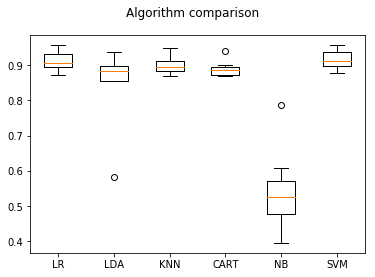

In [441]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.suptitle('Algorithm comparison')
#plt.show()
plt.savefig('F:/gf4005001007777777772888222222266666688888888822.png')


In [442]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

E:\ana\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
p=pd.DataFrame(predictions)
p.columns=['Gas Utility']
p.index=a11
df31['Gas Utility'][df31['Gas Utility'].isna()]=p['Gas Utility']

NameError: name 'predictions' is not defined

In [444]:
df31.isnull().sum()


Gas Utility                                                              0
Total Project Cost                                                       0
Total Incentives                                                         0
Amount Financed Through Program                                          0
Year Home Built                                                          0
Size of Home                                                             0
Volume of Home                                                           0
Number of Units                                                          0
Estimated Annual kWh Savings                                             0
Estimated Annual MMBtu Savings                                           0
First Year Energy Savings $ Estimate                                     0
Customer Type                                                            0
Home Performance                                                         0
Homeowner Received Green 

In [33]:
a1=df[df['Gas Utility'].isnull()]
a11=a1.index
a11

Int64Index([    2,     4,     7,    14,    17,    19,    20,    21,    22,
               23,
            ...
            57884, 57885, 57888, 57889, 57891, 57899, 57900, 57909, 57913,
            57915],
           dtype='int64', length=16117)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train);

E:\ana\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
#print(classification_report(y_test,predictions))
p=pd.DataFrame(predictions)
p.columns=['Gas Utility']
p.index=a11
df31['Gas Utility'][df31['Gas Utility'].isna()]=p['Gas Utility']


E:\ana\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [38]:
df31['Gas Utility'][df31['Gas Utility'].isna()]

Series([], Name: Gas Utility, dtype: object)

In [41]:
df32.isnull().sum()

Gas Utility                                                              0
Total Project Cost                                                       0
Total Incentives                                                         0
Amount Financed Through Program                                          0
Year Home Built                                                          0
Size of Home                                                             0
Volume of Home                                                           0
Number of Units                                                          0
Estimated Annual kWh Savings                                             0
Estimated Annual MMBtu Savings                                           0
First Year Energy Savings $ Estimate                                     0
Customer Type                                                            0
Home Performance                                                         0
Homeowner Received Green 

In [76]:
df32.isnull().sum()

Gas Utility                                                              0
Total Project Cost                                                       0
Total Incentives                                                         0
Amount Financed Through Program                                          0
Year Home Built                                                          0
Size of Home                                                             0
Volume of Home                                                           0
Number of Units                                                          0
Estimated Annual kWh Savings                                             0
Estimated Annual MMBtu Savings                                           0
First Year Energy Savings $ Estimate                                     0
Customer Type                                                            0
Home Performance                                                         0
Homeowner Received Green 

In [39]:
df32=pd.DataFrame()
df32=df31
df32['Gas Utility'].value_counts()


Rochester Gas & Electric          13727
National Grid                     13509
Central Hudson Gas & Electric      7743
National Fuel Gas Distribution     6233
Saint Lawrence Gas                 5175
New York State Electric & Gas      4422
KeySpan Energy                     2497
Consolidated Edison                2058
Multiple Gas Providers              827
Orange & Rockland                   808
Long Island Power Authority         671
Corning Natural Gas                 182
No Gas Provider                      49
Municipal                            23
Name: Gas Utility, dtype: int64

In [449]:
top_10=[x for x in df32['Gas Utility'].value_counts().sort_values(ascending=False).head(15).index]
def one_top(df32,variable,top_x_lable):
    for lable in top_x_lable:
        df32[variable+'_'+lable]=np.where(df32[variable]==lable,1,0)
one_top(df32,'Gas Utility',top_10)

In [450]:
df32=df32.drop('Gas Utility',1)

In [451]:
df32.columns

Index(['Total Project Cost', 'Total Incentives',
       'Amount Financed Through Program', 'Year Home Built', 'Size of Home',
       'Volume of Home', 'Number of Units', 'Estimated Annual kWh Savings',
       'Estimated Annual MMBtu Savings',
       'First Year Energy Savings $ Estimate', 'Customer Type',
       'Home Performance',
       'Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)',
       'Project County_Monroe', 'Project County_Erie',
       'Project County_Suffolk', 'Project County_Onondaga',
       'Project County_Westchester', 'Project County_Jefferson',
       'Project County_Oneida', 'Project County_Nassau',
       'Project County_Ontario', 'Project County_Wayne',
       'Project City_Rochester', 'Project City_Buffalo',
       'Project City_Watertown', 'Project City_Syracuse',
       'Project City_Webster', 'Project City_Pittsford', 'Project City_Utica',
       'Project City_Fort Drum', 'Project City_Ithaca',
       'Project City_Tonawanda', 'Electric 

In [462]:
df33=df32.drop(['Estimated Annual kWh Savings','First Year Energy Savings $ Estimate'],1)

In [463]:
X5=df33.drop('Estimated Annual MMBtu Savings',1)
y5=df33.loc[:,'Estimated Annual MMBtu Savings']

In [464]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [465]:
predictions = lm.predict(X_test)

In [466]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 20.723014022322758


In [358]:
df32.to_excel('excell.xlsx')

In [ ]:
df11['Gas Utility']=df11['Gas Utility'].fillna()

In [ ]:
df11.fillna

In [470]:
df['Estimated Annual kWh Savings'].max()-df['Estimated Annual kWh Savings'].min()

201843

In [472]:
df['First Year Energy Savings $ Estimate'].max()-df['First Year Energy Savings $ Estimate'].min()

24396

In [473]:
df['Estimated Annual MMBtu Savings'].max()-df['Estimated Annual MMBtu Savings'].min()

817

In [483]:
df['Measure Type'].value_counts()

Building Shell         57251
Heating and Cooling      667
Water Heater               6
Name: Measure Type, dtype: int64

In [107]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [115]:
X5=df_filled.drop('Number of Units',1)
y5=df_filled.loc[:,'Number of Units' ]

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
predictions = lm.predict(X_test)


In [109]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 0.2263081205813908


In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
rfc_pred = rfc.predict(X_test)

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99     22506
         2.0       0.64      0.16      0.25       541
         3.0       0.82      0.12      0.21        76
         4.0       0.75      0.06      0.12        47

    accuracy                           0.97     23170
   macro avg       0.80      0.33      0.39     23170
weighted avg       0.97      0.97      0.97     23170



In [147]:
df4=df1.loc[:,['Total Incentives','Estimated Annual MMBtu Savings','Size of Home','Volume of Home','Number of Units','Year Home Built']]

In [148]:
df4.isnull().sum()

Total Incentives                      0
Estimated Annual MMBtu Savings        0
Size of Home                      10306
Volume of Home                    13424
Number of Units                   17475
Year Home Built                   17411
dtype: int64

In [123]:
imputer=KNNImputer(n_neighbors=1)
df_filled1=imputer.fit_transform(df4)
df_filled1=pd.DataFrame(df_filled1)

In [126]:
df_filled1.columns=df4.columns

In [141]:
X51=df_filled1.drop('Volume of Home',1)
y52=df_filled1.loc[:,'Volume of Home' ]

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X51, y52, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
predictions = lm.predict(X_test)

In [144]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 9205.168756057956


In [189]:
df5=df1.loc[:,['Size of Home','Volume of Home','Number of Units','Year Home Built']]

In [190]:
imputer=KNNImputer(n_neighbors=1)
df_filled2=imputer.fit_transform(df5)
df_filled2=pd.DataFrame(df_filled2)

In [191]:
df_filled2.columns=df5.columns

In [196]:
X511=df_filled2.drop('Year Home Built',1)
y522=df_filled2.loc[:,'Year Home Built']

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X511, y522, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
predictions = lm.predict(X_test)

In [199]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 33.9415514331612


In [202]:
df6=df1.loc[:,['Year Home Built','Estimated Annual MMBtu Savings']]

In [203]:
imputer=KNNImputer(n_neighbors=1)
df_filled3=imputer.fit_transform(df6)
df_filled3=pd.DataFrame(df_filled3)

In [204]:
df_filled3.columns=df6.columns

In [205]:
X5111=df_filled2.drop('Year Home Built',1)
y5222=df_filled2.loc[:,'Year Home Built']

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X5111, y5222, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
predictions = lm.predict(X_test)

In [208]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 33.9415514331612


In [280]:
df22=df2.drop(['First Year Energy Savings $ Estimate','Estimated Annual kWh Savings'],1)

In [281]:
df22.head()

,Total Project Cost,Total Incentives,Amount Financed Through Program,Year Home Built,Size of Home,Volume of Home,Number of Units,Estimated Annual MMBtu Savings,Customer Type,Home Performance,...,Pre-Retrofit Home Heating Fuel Type_Electricity,Pre-Retrofit Home Heating Fuel Type_Wood,Pre-Retrofit Home Heating Fuel Type_Wood Pellets,Pre-Retrofit Home Heating Fuel Type_Kerosene,Pre-Retrofit Home Heating Fuel Type_Coal,Pre-Retrofit Home Heating Fuel Type_Bituminous Coal,Pre-Retrofit Home Heating Fuel Type_Anthracite Coal,Measure Type_Building Shell,Measure Type_Heating and Cooling,Measure Type_Water Heater
0,5235,524,0.0,1900.0,2160.0,25200.0,1.0,49,0,1,...,0,0,0,0,0,0,0,1,0,0
2,4310,431,0.0,1975.0,1872.0,16016.0,1.0,24,0,1,...,0,0,0,1,0,0,0,1,0,0
3,3570,357,0.0,1956.0,1972.0,30232.0,1.0,6,0,1,...,0,0,0,0,0,0,0,1,0,0
4,3785,379,0.0,1976.0,1008.0,10272.0,1.0,11,0,1,...,0,0,0,1,0,0,0,1,0,0
5,4780,478,0.0,1955.0,2688.0,37152.0,1.0,25,0,1,...,0,0,0,0,0,0,0,1,0,0


In [218]:
df22.shape

(33601, 81)

In [212]:
from sklearn.preprocessing import normalize

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df22.drop('Estimated Annual MMBtu Savings',axis=1))
scaled_features = scaler.transform(df22.drop('Estimated Annual MMBtu Savings',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=f)
df_feat.head()
f=[]
for i in range(81):
    f.append(df22.columns[i])
f.remove('Estimated Annual MMBtu Savings')

,Total Project Cost,Total Incentives,Amount Financed Through Program,Year Home Built,Size of Home,Volume of Home,Number of Units,Customer Type,Home Performance,Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N),...,Pre-Retrofit Home Heating Fuel Type_Electricity,Pre-Retrofit Home Heating Fuel Type_Wood,Pre-Retrofit Home Heating Fuel Type_Wood Pellets,Pre-Retrofit Home Heating Fuel Type_Kerosene,Pre-Retrofit Home Heating Fuel Type_Coal,Pre-Retrofit Home Heating Fuel Type_Bituminous Coal,Pre-Retrofit Home Heating Fuel Type_Anthracite Coal,Measure Type_Building Shell,Measure Type_Heating and Cooling,Measure Type_Water Heater
0,-0.561263,-0.620677,-0.545924,-1.247531,0.377364,1.381159,-0.157247,-0.752503,0.0,0.453802,...,-0.141219,-0.101105,-0.058603,-0.049461,-0.030875,-0.035796,-0.016368,0.107093,-0.106666,-0.009449
1,-0.732120,-0.676304,-0.545924,0.757382,-0.044868,-0.041110,-0.157247,-0.752503,0.0,0.453802,...,-0.141219,-0.101105,-0.058603,20.218019,-0.030875,-0.035796,-0.016368,0.107093,-0.106666,-0.009449
2,-0.868805,-0.720567,-0.545924,0.249470,0.101740,2.160433,-0.157247,-0.752503,0.0,0.453802,...,-0.141219,-0.101105,-0.058603,-0.049461,-0.030875,-0.035796,-0.016368,0.107093,-0.106666,-0.009449
3,-0.829093,-0.707408,-0.545924,0.784114,-1.311566,-0.930647,-0.157247,-0.752503,0.0,0.453802,...,-0.141219,-0.101105,-0.058603,20.218019,-0.030875,-0.035796,-0.016368,0.107093,-0.106666,-0.009449
4,-0.645306,-0.648192,-0.545924,0.222738,1.151457,3.232091,-0.157247,-0.752503,0.0,0.453802,...,-0.141219,-0.101105,-0.058603,-0.049461,-0.030875,-0.035796,-0.016368,0.107093,-0.106666,-0.009449


In [285]:
len(f)

81

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [223]:
from sklearn.model_selection import train_test_split

In [300]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df22['Estimated Annual MMBtu Savings'],
                                                    test_size=0.20)

In [301]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [302]:
predictions = lm.predict(X_test)

In [304]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 19.378332194370234


In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)

In [57]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
pred = knn.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(confusion_matrix(y_test,pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [61]:
from sklearn.metrics import accuracy_score

In [62]:
a=accuracy_score(y_test,pred)
a

0.2669378037893066

In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      -24858       0.00      0.00      0.00         0
      -24533       0.00      0.00      0.00         0
      -17992       0.00      0.00      0.00         0
      -16758       0.00      0.00      0.00         1
      -15423       0.00      0.00      0.00         0
      -15346       0.00      0.00      0.00         1
      -15273       0.00      0.00      0.00         0
      -14977       0.00      0.00      0.00         0
      -14329       0.00      0.00      0.00         0
      -13939       0.00      0.00      0.00         0
      -13443       0.00      0.00      0.00         1
      -12994       0.00      0.00      0.00         1
      -12526       0.00      0.00      0.00         0
      -12334       0.00      0.00      0.00         1
      -12190       0.00      0.00      0.00         0
      -12061       0.00      0.00      0.00         0
      -11919       0.00      0.00      0.00         1
      -11740       0.00    

E:\ana\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ana\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [342]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

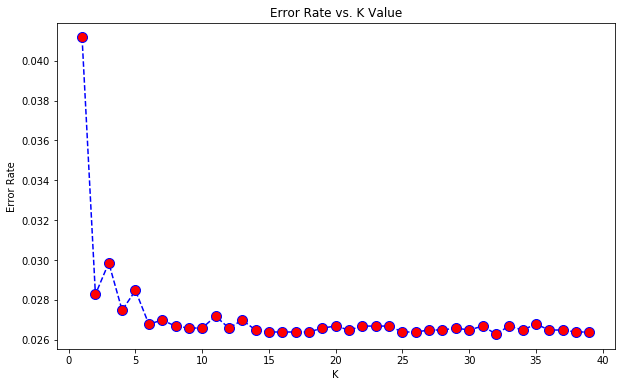

In [343]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [71]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [74]:
df1=df.drop(['Project County','Project City','Gas Utility','Electric Utility','Project Completion Date','Customer Type','Low-Rise or Home Performance Indicator','Type of Program Financing','Pre-Retrofit Home Heating Fuel Type','Measure Type','Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)'],1)

In [75]:
df2=df1.dropna(axis=0,how='any')

In [76]:
df2.shape

(33601, 82)

In [77]:
X=df2.drop('Year Home Built',1)

In [78]:

y=df2.loc[:,'Year Home Built']

In [ ]:
y=df2.loc[:,'Year Home Built']

In [85]:
m = LinearSVC(C=0.001, penalty="l1", dual=False)  # the smaller C the fewer features selected
clf = m.fit(X, y);

E:\ana\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [80]:
s = SelectFromModel(clf, prefit=True)

In [81]:
Xnew1 = s.transform(X)
Xnew1.shape

(33601, 39)

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [83]:
clf = ExtraTreesClassifier(n_estimators = 50)
clf = clf.fit(X, y)


In [90]:
a=clf.feature_importances_ 

In [91]:
model = SelectFromModel(clf, prefit=True)
Xnew = model.transform(X)
Xnew.shape

(33601, 8)

In [104]:
X.columns[1]


'Total Incentives'

In [105]:
f=[]
for i in range(81):
    print(X.columns[i],': ',a[i])
    

Total Project Cost :  0.12476956418405684
Total Incentives :  0.09570898765932095
Amount Financed Through Program :  0.03647334832783189
Size of Home :  0.1272681213559579
Volume of Home :  0.1269880226616202
Number of Units :  0.00638623323431816
Estimated Annual kWh Savings :  0.11147107932784933
Estimated Annual MMBtu Savings :  0.1149101401099735
First Year Energy Savings $ Estimate :  0.12465614492251818
Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)_Y :  0.007987775404422588
Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)_N :  0.007907393752389563
Project County_Monroe :  0.002168993640387009
Project County_Erie :  0.0020005201810453736
Project County_Suffolk :  0.00015686058015220713
Project County_Onondaga :  0.0031416751293501057
Project County_Westchester :  0.0012558679247288095
Project County_Jefferson :  0.0011661611297262475
Project County_Oneida :  0.0034653550486674644
Project County_Nassau :  0.00022349155069924714
Project Cou

In [106]:
y2=df2.loc[:,'Size of Home']

In [107]:
X2=df2.drop('Size of Home',1)

In [40]:
df1.shape

(57924, 82)

In [43]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

1

In [48]:
s = SelectKBest(chi2, k=50 )

In [9]:
df_dum1=pd.get_dummies(df['Project County'])

In [10]:
df_dum2=pd.get_dummies(df['Project City'])

In [11]:
df_dum3=pd.get_dummies(df['Gas Utility'])

In [12]:
df_dum4=pd.get_dummies(df['Electric Utility'])

In [21]:
df_dum5=pd.get_dummies(df['Type of Program Financing'])

In [14]:
df_dum6=pd.get_dummies(df['Pre-Retrofit Home Heating Fuel Type'])

In [15]:
df_dum7=pd.get_dummies(df['Measure Type'])

In [16]:
df_dum8=pd.get_dummies(df['Customer Type'])

In [17]:
df_dum9=pd.get_dummies(df['Low-Rise or Home Performance Indicator'])

In [18]:
df_dum10=pd.get_dummies(df['Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)'])

In [26]:
df1=df.join(df_dum1)
df1.head()

,Project County,Project City,Gas Utility,Electric Utility,Project Completion Date,Customer Type,Low-Rise or Home Performance Indicator,Total Project Cost,Total Incentives,Type of Program Financing,...,Sullivan,Tioga,Tompkins,Ulster,Warren,Washington,Wayne,Westchester,Wyoming,Yates
0,Herkimer,Salisbury Center,National Grid,National Grid,2015-12-11 00:00:00,Market,Home Performance,5235,524,not financed,...,0,0,0,0,0,0,0,0,0,0
1,Oneida,Clinton,National Grid,National Grid,11/13/2015,Market,Home Performance,4145,415,not financed,...,0,0,0,0,0,0,0,0,0,0
2,Onondaga,Marietta,NaN,New York State Electric & Gas,11/13/2015,Market,Home Performance,4310,431,not financed,...,0,0,0,0,0,0,0,0,0,0
3,Herkimer,Ilion,National Grid,Municipal (Not Qualified),11/13/2015,Market,Home Performance,3570,357,not financed,...,0,0,0,0,0,0,0,0,0,0
4,Oneida,Vernon,NaN,National Grid,2015-09-12 00:00:00,Market,Home Performance,3785,379,not financed,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [33]:
#df['Type of Program Financing'].value_counts()

Green Jobs - Green NY Smart Energy Loan        13396
Green Jobs - Green NY On-Bill Recovery Loan     3902
ESMART                                           228
ESTAR                                             86
Name: Type of Program Financing, dtype: int64

In [34]:
df['Type of Program Financing']=df['Type of Program Financing'].replace(np.nan,'not financed')

In [35]:
#df['Type of Program Financing'].value_counts()

not financed                                   40312
Green Jobs - Green NY Smart Energy Loan        13396
Green Jobs - Green NY On-Bill Recovery Loan     3902
ESMART                                           228
ESTAR                                             86
Name: Type of Program Financing, dtype: int64

In [36]:
#df.isnull().sum()

Project County                                                              2
Project City                                                                0
Gas Utility                                                             16117
Electric Utility                                                            0
Project Completion Date                                                     0
Customer Type                                                               0
Low-Rise or Home Performance Indicator                                      0
Total Project Cost                                                          0
Total Incentives                                                            0
Type of Program Financing                                                   0
Amount Financed Through Program                                             1
Pre-Retrofit Home Heating Fuel Type                                        45
Year Home Built                                                 

In [17]:
#df1=df.groupby('Size of Home')

In [40]:
#df_part=df.loc[:,['Gas Utility','Size of Home','Volume of Home','Number of Units']]

In [41]:
#df_part.head()

,Gas Utility,Size of Home,Volume of Home,Number of Units
0,National Grid,2160.0,25200.0,1.0
1,National Grid,1843.0,NaN,1.0
2,NaN,1872.0,16016.0,1.0
3,National Grid,1972.0,30232.0,1.0
4,NaN,1008.0,10272.0,1.0


In [103]:
#df.columns

Index(['Project County', 'Project City', 'Gas Utility', 'Electric Utility',
       'Project Completion Date', 'Customer Type',
       'Low-Rise or Home Performance Indicator', 'Total Project Cost',
       'Total Incentives', 'Type of Program Financing',
       'Amount Financed Through Program',
       'Pre-Retrofit Home Heating Fuel Type', 'Year Home Built',
       'Size of Home', 'Volume of Home', 'Number of Units', 'Measure Type',
       'Estimated Annual kWh Savings', 'Estimated Annual MMBtu Savings',
       'First Year Energy Savings $ Estimate',
       'Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)'],
      dtype='object')

In [104]:
#from sklearn.datasets import load_iris
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

In [31]:
s = SelectKBest(chi2, k=1 )

In [86]:
df2=pd.get_dummies(df_part['Gas Utility'])

In [87]:
#df.info()

In [88]:
df2.head()

,Central Hudson Gas & Electric,Consolidated Edison,Corning Natural Gas,KeySpan Energy,Long Island Power Authority,Multiple Gas Providers,Municipal,National Fuel Gas Distribution,National Grid,New York State Electric & Gas,No Gas Provider,Orange & Rockland,Rochester Gas & Electric,Saint Lawrence Gas
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
df2.columns

Index(['Central Hudson Gas & Electric', 'Consolidated Edison',
       'Corning Natural Gas', 'KeySpan Energy', 'Long Island Power Authority',
       'Multiple Gas Providers', 'Municipal', 'National Fuel Gas Distribution',
       'National Grid', 'New York State Electric & Gas', 'No Gas Provider',
       'Orange & Rockland', 'Rochester Gas & Electric', 'Saint Lawrence Gas'],
      dtype='object')

In [90]:
df3=df_part.join(df2)
df3.head(3)

,Gas Utility,Size of Home,Volume of Home,Number of Units,Central Hudson Gas & Electric,Consolidated Edison,Corning Natural Gas,KeySpan Energy,Long Island Power Authority,Multiple Gas Providers,Municipal,National Fuel Gas Distribution,National Grid,New York State Electric & Gas,No Gas Provider,Orange & Rockland,Rochester Gas & Electric,Saint Lawrence Gas
0,National Grid,2160.0,25200.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,National Grid,1843.0,NaN,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,NaN,1872.0,16016.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
df3.drop('Gas Utility',axis=1,inplace=True)

In [92]:
a=df3.columns

In [93]:
from sklearn.impute import KNNImputer

In [94]:
imputer=KNNImputer(n_neighbors=2)

In [95]:

df_filled=imputer.fit_transform(df3)

In [96]:
df_filled=pd.DataFrame(df_filled)

In [98]:
df_filled.columns=a

In [99]:
df_filled

,Size of Home,Volume of Home,Number of Units,Central Hudson Gas & Electric,Consolidated Edison,Corning Natural Gas,KeySpan Energy,Long Island Power Authority,Multiple Gas Providers,Municipal,National Fuel Gas Distribution,National Grid,New York State Electric & Gas,No Gas Provider,Orange & Rockland,Rochester Gas & Electric,Saint Lawrence Gas
0,2160.0,25200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1843.0,5884.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1872.0,16016.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1972.0,30232.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1008.0,10272.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2688.0,37152.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1128.0,5884.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,2024.0,28672.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2398.0,30496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1196.0,16744.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [100]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57924 entries, 0 to 57923
Data columns (total 17 columns):
Size of Home                      57924 non-null float64
Volume of Home                    57924 non-null float64
Number of Units                   57924 non-null float64
Central Hudson Gas & Electric     57924 non-null float64
Consolidated Edison               57924 non-null float64
Corning Natural Gas               57924 non-null float64
KeySpan Energy                    57924 non-null float64
Long Island Power Authority       57924 non-null float64
Multiple Gas Providers            57924 non-null float64
Municipal                         57924 non-null float64
National Fuel Gas Distribution    57924 non-null float64
National Grid                     57924 non-null float64
New York State Electric & Gas     57924 non-null float64
No Gas Provider                   57924 non-null float64
Orange & Rockland                 57924 non-null float64
Rochester Gas & Electric          57

In [101]:
df_filled.describe()

,Size of Home,Volume of Home,Number of Units,Central Hudson Gas & Electric,Consolidated Edison,Corning Natural Gas,KeySpan Energy,Long Island Power Authority,Multiple Gas Providers,Municipal,National Fuel Gas Distribution,National Grid,New York State Electric & Gas,No Gas Provider,Orange & Rockland,Rochester Gas & Electric,Saint Lawrence Gas
count,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000,57924.000000
mean,1816.796639,17411.185044,1.028132,0.010341,0.035288,0.003090,0.000552,0.000173,0.001485,0.000380,0.107607,0.233219,0.076341,0.000846,0.013949,0.236983,0.001502
std,665.764673,9142.594644,0.200581,0.101165,0.184507,0.055505,0.023498,0.013138,0.038504,0.019485,0.309885,0.422884,0.265546,0.029073,0.117282,0.425235,0.038726
min,387.000000,1088.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1366.000000,11808.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1664.000000,15863.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2118.000000,21536.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5512.000000,334776.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
df_filled.isnull().sum()

Size of Home                      0
Volume of Home                    0
Number of Units                   0
Central Hudson Gas & Electric     0
Consolidated Edison               0
Corning Natural Gas               0
KeySpan Energy                    0
Long Island Power Authority       0
Multiple Gas Providers            0
Municipal                         0
National Fuel Gas Distribution    0
National Grid                     0
New York State Electric & Gas     0
No Gas Provider                   0
Orange & Rockland                 0
Rochester Gas & Electric          0
Saint Lawrence Gas                0
dtype: int64

In [73]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in e:\ana\lib\site-packages (0.22.2.post1)
Note: you may need to restart the kernel to use updated packages.


Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)")': /simple/scikit-learn/


In [74]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in e:\ana\lib\site-packages (0.22.2.post1)
Note: you may need to restart the kernel to use updated packages.


In [77]:
conda update scikit-learn


Note: you may need to restart the kernel to use updated packages.



PackageNotInstalledError: Package is not installed in prefix.
  prefix: E:\ana
  package name: scikit-learn


